In [2]:
import numpy as np
import pandas as pd

# 处理缺失数据

我们在数据处理时会经常遇到缺失数据（如股票停牌）  
pandas在设计的时候就充分考虑到了处理缺失数据的简便性

我们先构造一个带有缺失值的DataFrame

In [4]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],
                  columns=['one', 'two', 'three'])
df

,one,two,three
a,1.071261,-0.097125,-1.011635
c,-0.647603,0.793376,-2.004859
e,-0.630700,-0.624195,-0.463720
f,1.058065,-0.177763,-1.026782
h,-1.047604,-0.969907,0.052912


In [5]:
df['four'] = 'bar'
df

,one,two,three,four
a,1.071261,-0.097125,-1.011635,bar
c,-0.647603,0.793376,-2.004859,bar
e,-0.630700,-0.624195,-0.463720,bar
f,1.058065,-0.177763,-1.026782,bar
h,-1.047604,-0.969907,0.052912,bar


In [7]:
df['five'] = df['one'] > 0
df

,one,two,three,four,five
a,1.071261,-0.097125,-1.011635,bar,True
c,-0.647603,0.793376,-2.004859,bar,False
e,-0.630700,-0.624195,-0.463720,bar,False
f,1.058065,-0.177763,-1.026782,bar,True
h,-1.047604,-0.969907,0.052912,bar,False


In [11]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,1.071261,-0.097125,-1.011635,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,-0.647603,0.793376,-2.004859,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,-0.630700,-0.624195,-0.463720,bar,False
f,1.058065,-0.177763,-1.026782,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-1.047604,-0.969907,0.052912,bar,False


判断是不是nan，可以使用isna()或notna()方法,返回bool数组

In [10]:
df2['one']

a    1.071261
b         NaN
c   -0.647603
d         NaN
e   -0.630700
f    1.058065
g         NaN
h   -1.047604
Name: one, dtype: float64

In [12]:
df2['one'].isna()

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [13]:
df2['one'].notna()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

In [14]:
df2.isna()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [25]:
df2.notna()

,one,two,three
a,False,True,True
c,False,True,True
e,False,True,True
f,True,True,True
h,True,True,True


nan与其他有效数值的运算结果都为nan

In [17]:
df

,one,two,three,four,five
a,1.071261,-0.097125,-1.011635,bar,True
c,-0.647603,0.793376,-2.004859,bar,False
e,-0.630700,-0.624195,-0.463720,bar,False
f,1.058065,-0.177763,-1.026782,bar,True
h,-1.047604,-0.969907,0.052912,bar,False


In [31]:
df2 = df.iloc[:, :3].copy()
df3 = df.iloc[:, :3].copy()
df2.iloc[:3, 0] = np.nan
df3.iloc[1:4, 1] = np.nan

In [32]:
df2

,one,two,three
a,NaN,-0.097125,-1.011635
c,NaN,0.793376,-2.004859
e,NaN,-0.624195,-0.463720
f,1.058065,-0.177763,-1.026782
h,-1.047604,-0.969907,0.052912


In [33]:
df3

,one,two,three
a,1.071261,-0.097125,-1.011635
c,-0.647603,NaN,-2.004859
e,-0.630700,NaN,-0.463720
f,1.058065,NaN,-1.026782
h,-1.047604,-0.969907,0.052912


In [34]:
df2 + df3

,one,two,three
a,NaN,-0.194251,-2.023271
c,NaN,NaN,-4.009719
e,NaN,NaN,-0.927440
f,2.116130,NaN,-2.053563
h,-2.095207,-1.939815,0.105823


## 填充缺失数据（fillna）

pandas提供了非常方便的处理nan的函数与方法

In [35]:
df2

,one,two,three
a,NaN,-0.097125,-1.011635
c,NaN,0.793376,-2.004859
e,NaN,-0.624195,-0.463720
f,1.058065,-0.177763,-1.026782
h,-1.047604,-0.969907,0.052912


fillna方法可以按照指定值填充nan

In [36]:
df2.fillna(0)

,one,two,three
a,0.000000,-0.097125,-1.011635
c,0.000000,0.793376,-2.004859
e,0.000000,-0.624195,-0.463720
f,1.058065,-0.177763,-1.026782
h,-1.047604,-0.969907,0.052912


In [39]:
df2.fillna("data missing")

,one,two,three
a,data missing,-0.097125,-1.011635
c,data missing,0.793376,-2.004859
e,data missing,-0.624195,-0.463720
f,1.05806,-0.177763,-1.026782
h,-1.0476,-0.969907,0.052912


可以选则前向填充或后向填充

In [41]:
df3

,one,two,three
a,1.071261,-0.097125,-1.011635
c,-0.647603,NaN,-2.004859
e,-0.630700,NaN,-0.463720
f,1.058065,NaN,-1.026782
h,-1.047604,-0.969907,0.052912


In [42]:
df3.fillna(method="ffill")

,one,two,three
a,1.071261,-0.097125,-1.011635
c,-0.647603,-0.097125,-2.004859
e,-0.630700,-0.097125,-0.463720
f,1.058065,-0.097125,-1.026782
h,-1.047604,-0.969907,0.052912


In [44]:
df3.fillna(method="bfill")

,one,two,three
a,1.071261,-0.097125,-1.011635
c,-0.647603,-0.969907,-2.004859
e,-0.630700,-0.969907,-0.463720
f,1.058065,-0.969907,-1.026782
h,-1.047604,-0.969907,0.052912


甚至还可以对填充的数量加以限制

In [45]:
df3.fillna(method="ffill", limit=1)

,one,two,three
a,1.071261,-0.097125,-1.011635
c,-0.647603,-0.097125,-2.004859
e,-0.630700,NaN,-0.463720
f,1.058065,NaN,-1.026782
h,-1.047604,-0.969907,0.052912


还可以强大到对每一列都用不同的值填充

In [48]:
df4 = df3.T
df4

,a,c,e,f,h
one,1.071261,-0.647603,-0.63070,1.058065,-1.047604
two,-0.097125,NaN,NaN,NaN,-0.969907
three,-1.011635,-2.004859,-0.46372,-1.026782,0.052912


In [50]:
df4.fillna({"c": 1, "e": 2, "f": 3})

,a,c,e,f,h
one,1.071261,-0.647603,-0.63070,1.058065,-1.047604
two,-0.097125,1.000000,2.00000,3.000000,-0.969907
three,-1.011635,-2.004859,-0.46372,-1.026782,0.052912


能传入dict，当然也能传入Series，pandas的用法就是很自由

In [54]:
df4.mean()

a   -0.012500
c   -1.326231
e   -0.547210
f    0.015642
h   -0.654866
dtype: float64

下面完成了用每一列对应的均值进行填充

In [55]:
df4.fillna(df4.mean())

,a,c,e,f,h
one,1.071261,-0.647603,-0.63070,1.058065,-1.047604
two,-0.097125,-1.326231,-0.54721,0.015642,-0.969907
three,-1.011635,-2.004859,-0.46372,-1.026782,0.052912


## 删除缺失数据（dropna）

In [ ]:
使用dropna方法，可以丢弃指定轴上的含有nan的列

In [57]:
df3

,one,two,three
a,1.071261,-0.097125,-1.011635
c,-0.647603,NaN,-2.004859
e,-0.630700,NaN,-0.463720
f,1.058065,NaN,-1.026782
h,-1.047604,-0.969907,0.052912


In [59]:
df3.dropna(axis=0)

,one,two,three
a,1.071261,-0.097125,-1.011635
h,-1.047604,-0.969907,0.052912


In [60]:
df3.dropna(axis=1)

,one,three
a,1.071261,-1.011635
c,-0.647603,-2.004859
e,-0.630700,-0.463720
f,1.058065,-1.026782
h,-1.047604,0.052912


In [61]:
df3.iloc[2, :] = np.nan

In [62]:
df3

,one,two,three
a,1.071261,-0.097125,-1.011635
c,-0.647603,NaN,-2.004859
e,NaN,NaN,NaN
f,1.058065,NaN,-1.026782
h,-1.047604,-0.969907,0.052912


可以通过how参数选择是全为nan才丢弃，还是有nan就丢弃

In [65]:
df3.dropna(axis=0, how="any")

,one,two,three
a,1.071261,-0.097125,-1.011635
h,-1.047604,-0.969907,0.052912


In [66]:
df3.dropna(axis=0, how="all")

,one,two,three
a,1.071261,-0.097125,-1.011635
c,-0.647603,NaN,-2.004859
f,1.058065,NaN,-1.026782
h,-1.047604,-0.969907,0.052912


## 插值（interpolate）

In [67]:
df = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
                   'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})

In [74]:
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


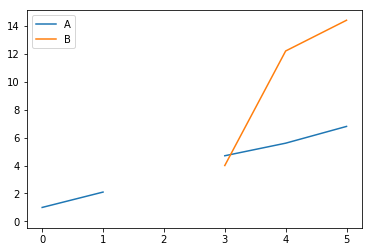

In [77]:
df.plot()

interpolate方法默认进行线性插值

In [80]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


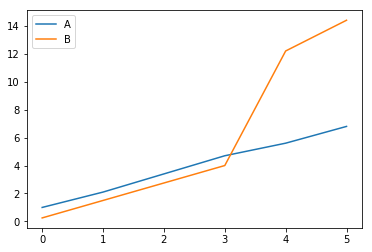

In [83]:
df.interpolate().plot()

可以通过更改method参数采用特定的插值方法，如二次函数插值

In [79]:
df.interpolate(method='quadratic')

,A,B
0,1.000000,0.250000
1,2.100000,-2.703846
2,3.451351,-1.453846
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


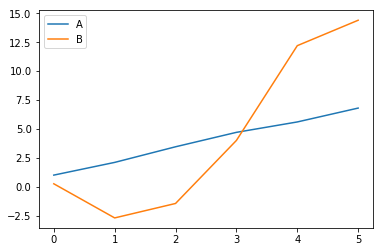

In [88]:
df.interpolate(method='quadratic').plot()

三次样条插值

In [86]:
df.interpolate(method='spline', order=3)

,A,B
0,1.000000,0.250000
1,2.100000,-0.428598
2,3.404545,1.206900
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000
